<a href="https://colab.research.google.com/github/aspiringastro/practical_deep_learning/blob/main/big_cats_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q fastai duckduckgo_search

In [9]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url

from fastai.vision.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')


Searching for 'jaguar'


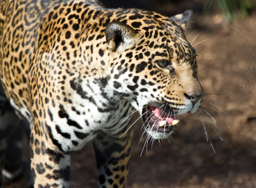

In [10]:
download_url(search_images('jaguar', max_images=1)[0], 'jaguar.jpg', show_progress=False)
Image.open('jaguar.jpg').to_thumb(256,256)

Searching for 'cheetah'


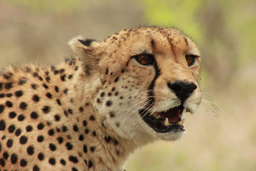

In [11]:
download_url(search_images('cheetah', max_images=1)[0], 'cheetah.jpg', show_progress=False)
Image.open('cheetah.jpg').to_thumb(256,256)

Searching for 'tiger'


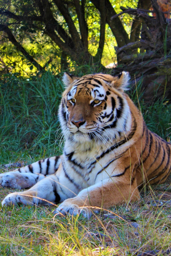

In [12]:
download_url(search_images('tiger', max_images=1)[0], 'tiger.jpg', show_progress=False)
Image.open('tiger.jpg').to_thumb(256,256)

Searching for 'lion'


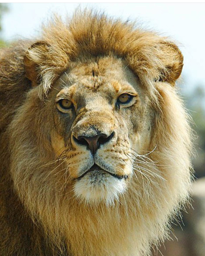

In [13]:
download_url(search_images('lion', max_images=1)[0], 'lion.jpg', show_progress=False)
Image.open('lion.jpg').to_thumb(256,256)

Searching for 'snow leopard'


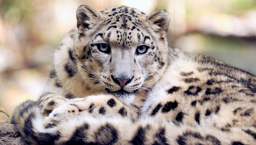

In [14]:
download_url(search_images('snow leopard', max_images=1)[0], 'snow leopard.jpg', show_progress=False)
Image.open('snow leopard.jpg').to_thumb(256,256)

Searching for 'clouded leopard'


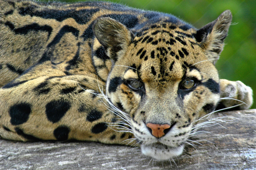

In [15]:
download_url(search_images('clouded leopard', max_images=1)[0], 'clouded leopard.jpg', show_progress=False)
Image.open('clouded leopard.jpg').to_thumb(256,256)

Searching for 'african leopard'


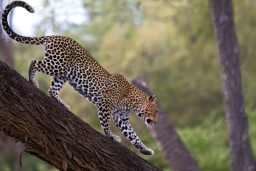

In [16]:
download_url(search_images('african leopard', max_images=1)[0], 'african leopard.jpg', show_progress=False)
Image.open('african leopard.jpg').to_thumb(256,256)

Searching for 'cougar'


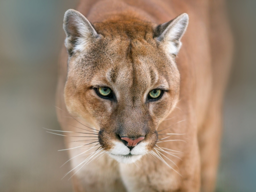

In [17]:
download_url(search_images('cougar', max_images=1)[0], 'cougar.jpg', show_progress=False)
Image.open('cougar.jpg').to_thumb(256,256)

In [18]:
searches = 'cheetah','jaguar','tiger','cougar','lion', 'african leopard', 'clouded leopard','snow leopard'
path = Path('big_cats')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} animal photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} crouching photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} side photo'))
    sleep(10)

    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'cheetah animal photo'
Searching for 'cheetah sun photo'
Searching for 'cheetah shade photo'
Searching for 'cheetah crouching photo'
Searching for 'cheetah side photo'


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'jaguar animal photo'
Searching for 'jaguar sun photo'
Searching for 'jaguar shade photo'
Searching for 'jaguar crouching photo'
Searching for 'jaguar side photo'
Searching for 'tiger animal photo'
Searching for 'tiger sun photo'
Searching for 'tiger shade photo'
Searching for 'tiger crouching photo'
Searching for 'tiger side photo'
Searching for 'cougar animal photo'
Searching for 'cougar sun photo'
Searching for 'cougar shade photo'
Searching for 'cougar crouching photo'
Searching for 'cougar side photo'
Searching for 'lion animal photo'
Searching for 'lion sun photo'
Searching for 'lion shade photo'
Searching for 'lion crouching photo'
Searching for 'lion side photo'
Searching for 'african leopard animal photo'
Searching for 'african leopard sun photo'
Searching for 'african leopard shade photo'
Searching for 'african leopard crouching photo'
Searching for 'african leopard side photo'


ERROR:duckduckgo_search.utils:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 597, in urlopen
    httplib_response = self._make_request(conn, method, url,
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 384, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "/usr/lib/python3.8/http/client.py", line 1348, in getresponse
    response.begin()
  File "/usr/lib/python3.8/http/client.py", line 316, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.8/http/client.py", line 285, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.RemoteDisconnected: Remote end closed connection without response

During handling of the above exception, a

Searching for 'clouded leopard animal photo'
Searching for 'clouded leopard sun photo'
Searching for 'clouded leopard shade photo'
Searching for 'clouded leopard crouching photo'
Searching for 'clouded leopard side photo'
Searching for 'snow leopard animal photo'
Searching for 'snow leopard sun photo'
Searching for 'snow leopard shade photo'
Searching for 'snow leopard crouching photo'
Searching for 'snow leopard side photo'


In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


10

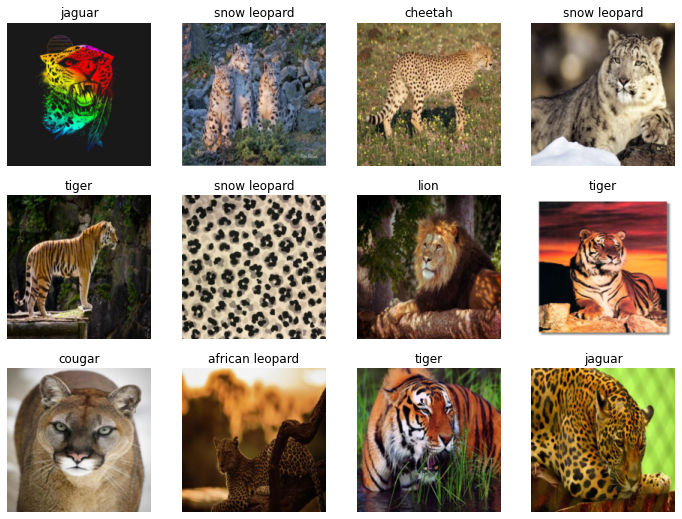

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [21]:
vision_models = { "resnet18" : resnet18, "resnet34" : resnet34, "resnet50": resnet50, "resnet101": resnet101, "resnet152": resnet152} 
learners = {}
for name, model in vision_models.items():
  learners[name] = vision_learner(dls, model, metrics=error_rate)
  learners[name].fine_tune(3)
  learners[name].export(fname=f'{name}-export.pki')
  


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

***************** resnet18 *****************


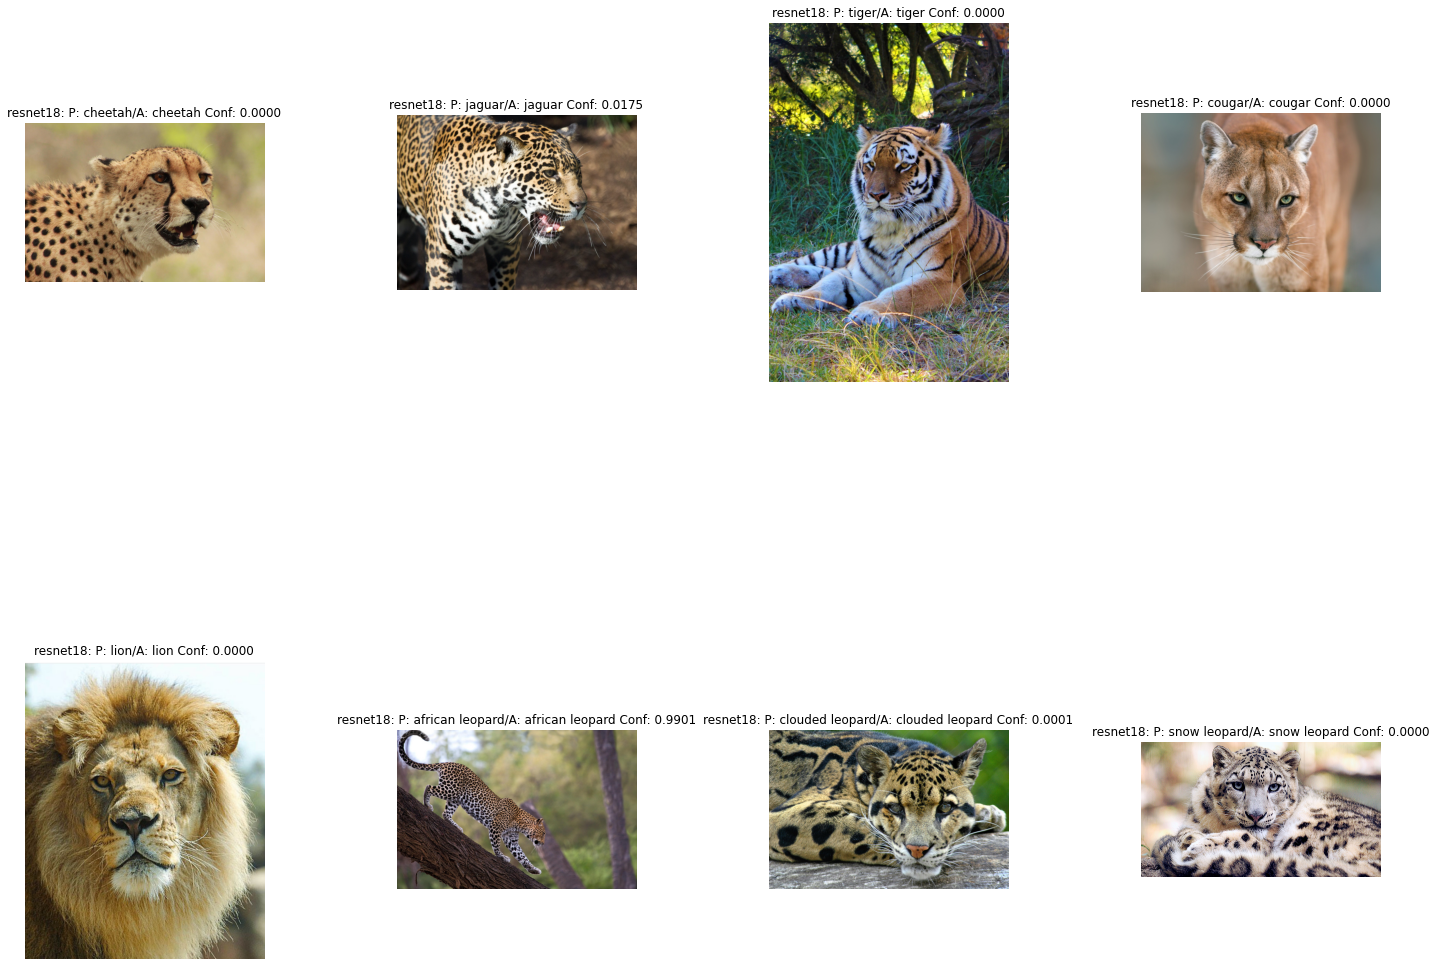

***************** resnet34 *****************


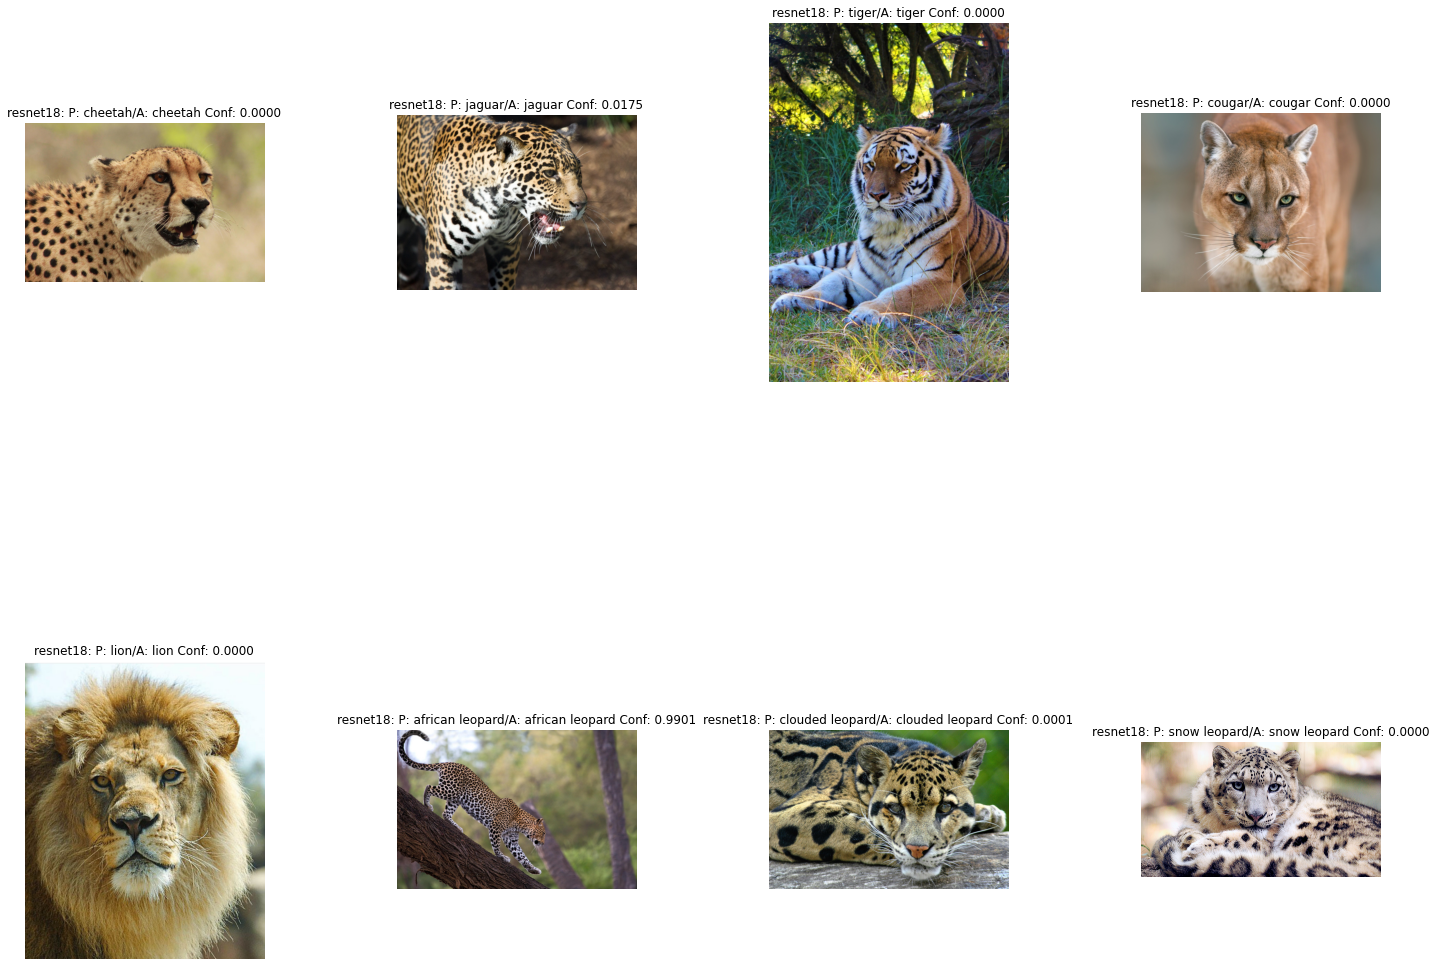

***************** resnet50 *****************


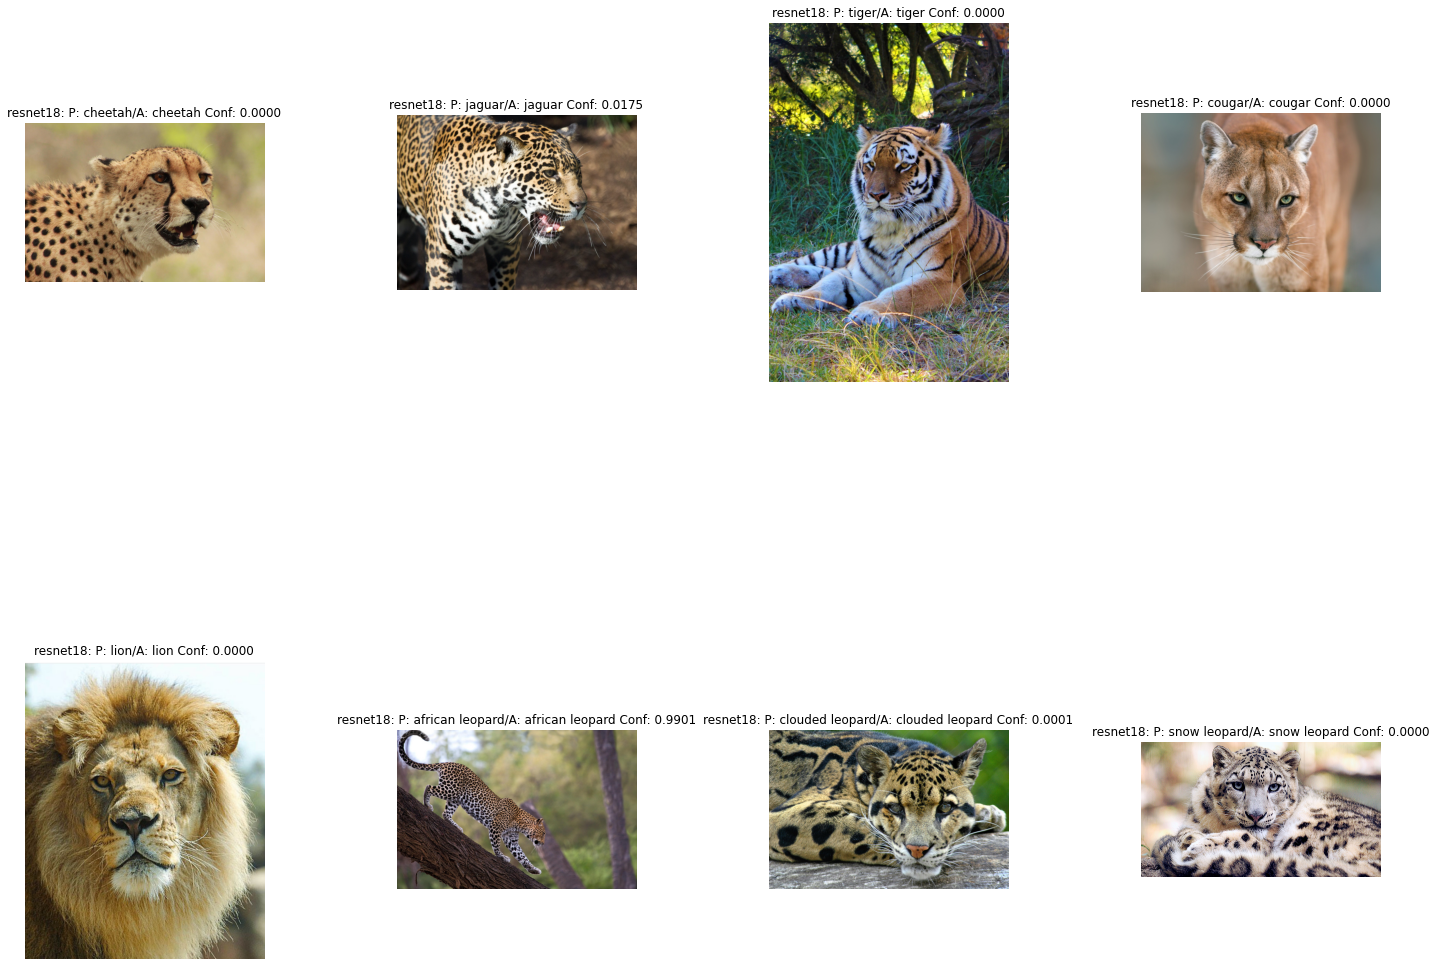

***************** resnet101 *****************


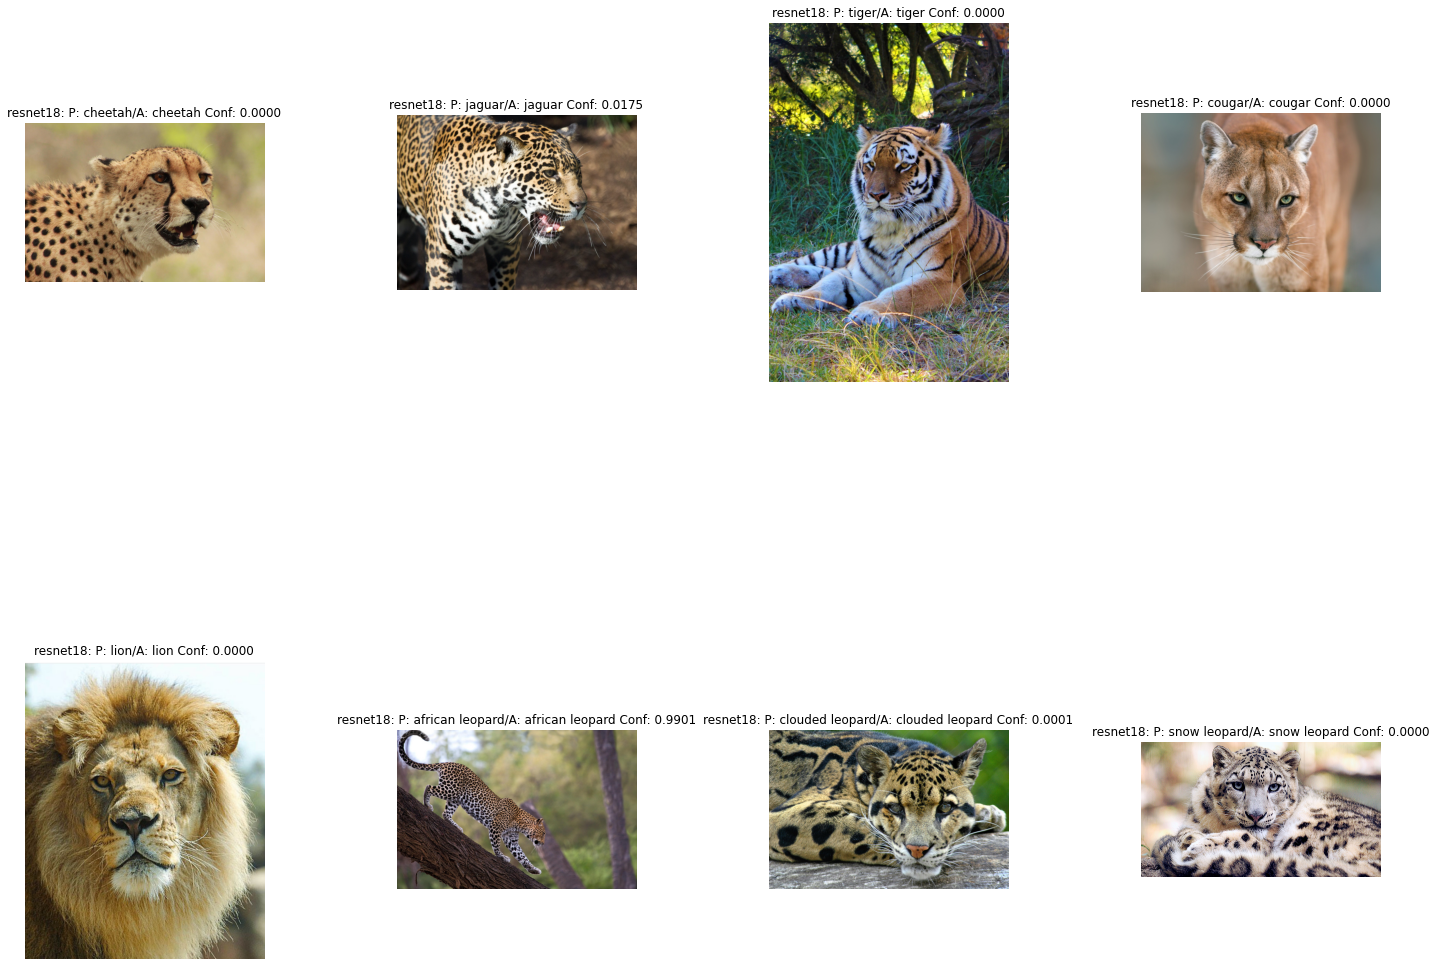

***************** resnet152 *****************


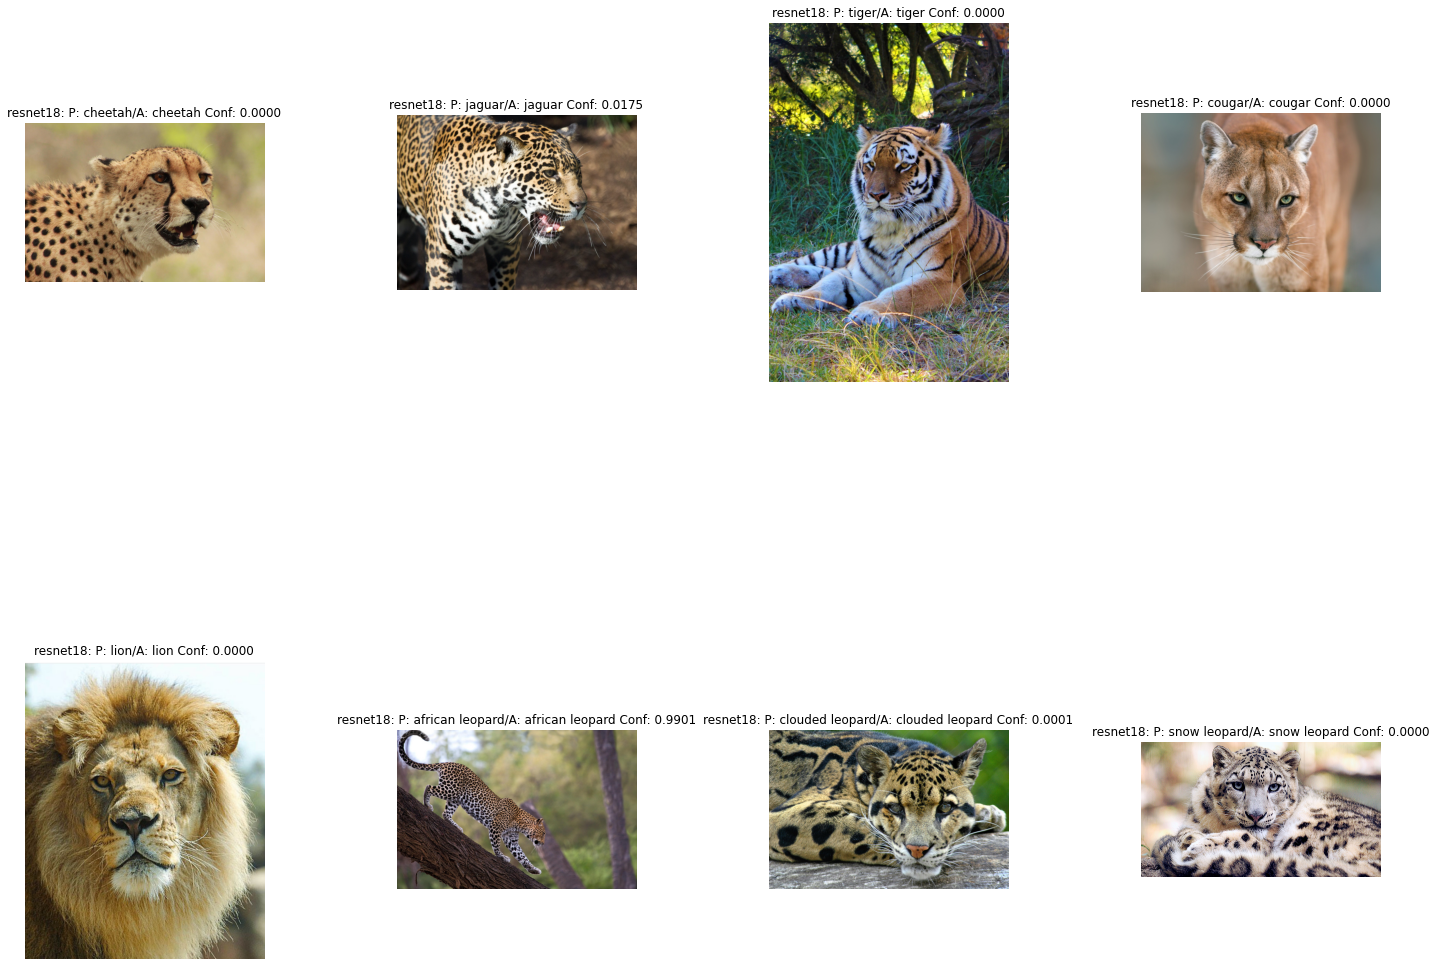

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

images = []
labels = []
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(2, len(searches)//2, figsize=(20,20))
    axes = axes.flatten()
    for img, title, ax in zip( images_arr, labels_arr, axes):
        img.resize((64,64))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

for name, model in vision_models.items():
  print(f'***************** {name} *****************')
  for cat in searches:
      img = PILImage.create(cat + '.jpg')
      what_cat, _, probs = learners[name].predict(img)
      labels.append(f'{name}: P: {what_cat}/A: {cat} Conf: {probs[0]:.4f}')
      images.append(img)
  plotImages(images, labels)
